In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

In [11]:
dataset = "Dopaminergic_TPM_clean"
sns.set_context("paper")

In [3]:
# Set-up matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

# All genes (no fitted distributions)
## Thresholds

In [4]:
vrs = pd.read_csv("{}/intermediate/vrs/optimal_thresholds.csv".format(dataset))
three_max = pd.read_csv("{}/intermediate/3max/optimal_thresholds.csv".format(dataset))
geomean = pd.read_csv("{}/intermediate/geomean/optimal_thresholds.csv".format(dataset))
thresholds = pd.DataFrame(
    [vrs.threshold,three_max.threshold,geomean.threshold], 
    index=["VRS", "three_max", "geo_mean"]
).T 

In [5]:
three_max.uncorrected_threshold[three_max.uncorrected_threshold < 0]

Series([], Name: uncorrected_threshold, dtype: float64)

In [6]:
display("Pearson")
display(thresholds.corr(method="pearson"))
display("Kendall")
display(thresholds.corr(method="kendall"))
display("Spearman")
display(thresholds.corr(method="spearman"))

'Pearson'

,VRS,three_max,geo_mean
VRS,1.000000,0.971269,0.900716
three_max,0.971269,1.000000,0.850881
geo_mean,0.900716,0.850881,1.000000


'Kendall'

,VRS,three_max,geo_mean
VRS,1.000000,0.891701,0.695493
three_max,0.891701,1.000000,0.715044
geo_mean,0.695493,0.715044,1.000000


'Spearman'

,VRS,three_max,geo_mean
VRS,1.000000,0.975571,0.838834
three_max,0.975571,1.000000,0.852887
geo_mean,0.838834,0.852887,1.000000


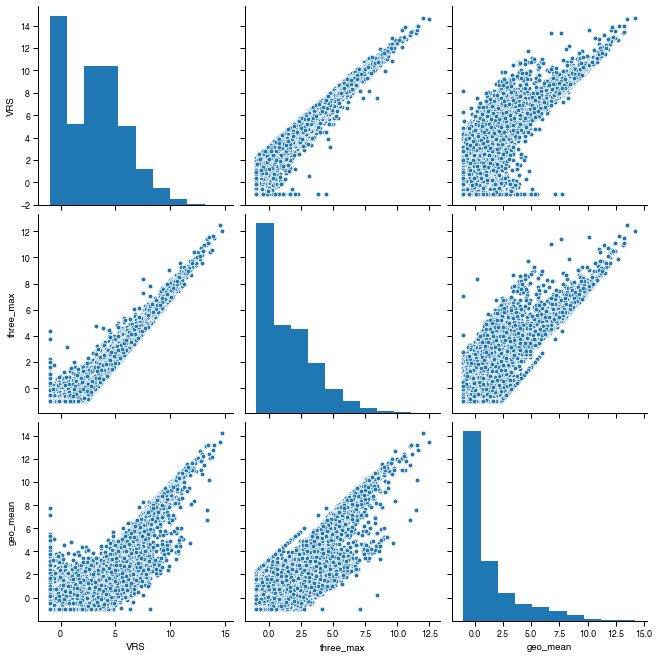

In [7]:
sns.pairplot(np.log2(thresholds), height=3, aspect=1.0)
plt.show()

## Expression frequency

In [8]:
vrs = pd.read_csv("{}/intermediate/vrs/dichotomised_genes.csv".format(dataset),index_col="gene_id").mean(axis=1)
three_max = pd.read_csv("{}/intermediate/3max/dichotomised_genes.csv".format(dataset), index_col="gene_id").mean(axis=1)
geo_mean = pd.read_csv("{}/intermediate/geomean/dichotomised_genes.csv".format(dataset), index_col="gene_id").mean(axis=1)
frequencies = pd.DataFrame(
    [vrs, three_max, geo_mean], 
    index=["VRS", "three_max", "geo_mean"]
).T

In [9]:
display("Pearson")
display(frequencies.corr(method="pearson"))
display("Kendall")
display(frequencies.corr(method="kendall"))
display("Spearman")
display(frequencies.corr(method="spearman"))

'Pearson'

,VRS,three_max,geo_mean
VRS,1.000000,0.846836,0.783538
three_max,0.846836,1.000000,0.939092
geo_mean,0.783538,0.939092,1.000000


'Kendall'

,VRS,three_max,geo_mean
VRS,1.000000,0.804650,0.759606
three_max,0.804650,1.000000,0.849772
geo_mean,0.759606,0.849772,1.000000


'Spearman'

,VRS,three_max,geo_mean
VRS,1.000000,0.935640,0.909543
three_max,0.935640,1.000000,0.949914
geo_mean,0.909543,0.949914,1.000000


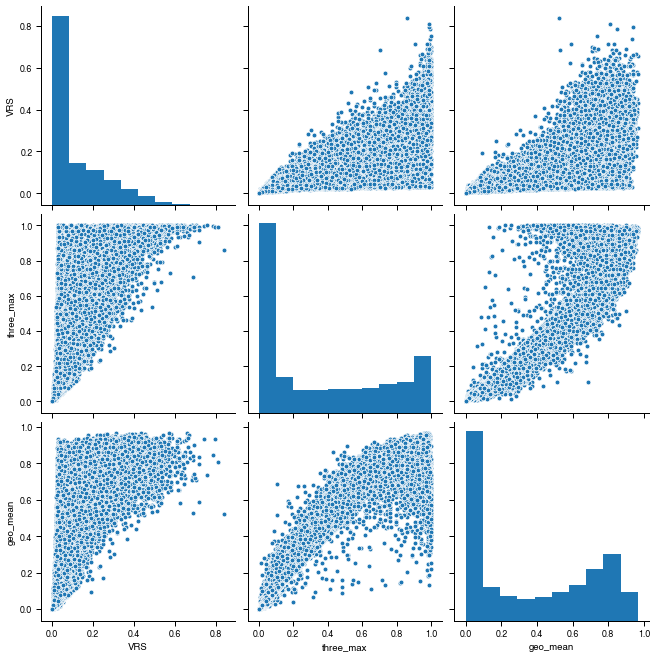

In [10]:
sns.pairplot(frequencies, height=3, aspect=1.0)
plt.show()

# Genes with idenified antimode
## Thresholds

In [11]:
dist = pd.read_csv("{}/mathematica/fitted_distributions_thresholds.csv".format(dataset),index_col="gene_id")
vrs = pd.read_csv("{}/intermediate/vrs/optimal_thresholds.csv".format(dataset),index_col="gene_id").loc[dist.index]
three_max = pd.read_csv("{}/intermediate/3max/optimal_thresholds.csv".format(dataset),index_col="gene_id").loc[dist.index]
geomean = pd.read_csv("{}/intermediate/geomean/optimal_thresholds.csv".format(dataset),index_col="gene_id").loc[dist.index]
thresholds = pd.DataFrame(
    [vrs.threshold,three_max.threshold,geomean.threshold,dist.threshold], 
    index=["VRS", "three_max", "geo_mean","fitted_distribution"]
).T 

In [12]:
three_max

,value,threshold,uncorrected_threshold
gene_id,,,
March1,NaN,0.500000,0.293058
March2,NaN,24.105618,24.105618
March3,NaN,0.692315,0.692315
March10,NaN,0.560080,0.560080
Sept1,NaN,0.738239,0.738239
...,...,...,...
Zufsp,NaN,2.463965,2.463965
Zxdb,NaN,0.500000,0.345113
Zxdc,NaN,1.426640,1.426640


In [13]:
display("Pearson")
display(thresholds.corr(method="pearson"))
display("Kendall")
display(thresholds.corr(method="kendall"))
display("Spearman")
display(thresholds.corr(method="spearman"))

'Pearson'

,VRS,three_max,geo_mean,fitted_distribution
VRS,1.000000,0.972605,0.907967,0.932036
three_max,0.972605,1.000000,0.839944,0.888369
geo_mean,0.907967,0.839944,1.000000,0.914430
fitted_distribution,0.932036,0.888369,0.914430,1.000000


'Kendall'

,VRS,three_max,geo_mean,fitted_distribution
VRS,1.000000,0.839919,0.524660,0.344698
three_max,0.839919,1.000000,0.571956,0.302254
geo_mean,0.524660,0.571956,1.000000,0.307565
fitted_distribution,0.344698,0.302254,0.307565,1.000000


'Spearman'

,VRS,three_max,geo_mean,fitted_distribution
VRS,1.000000,0.961056,0.657641,0.448381
three_max,0.961056,1.000000,0.705144,0.391152
geo_mean,0.657641,0.705144,1.000000,0.390347
fitted_distribution,0.448381,0.391152,0.390347,1.000000


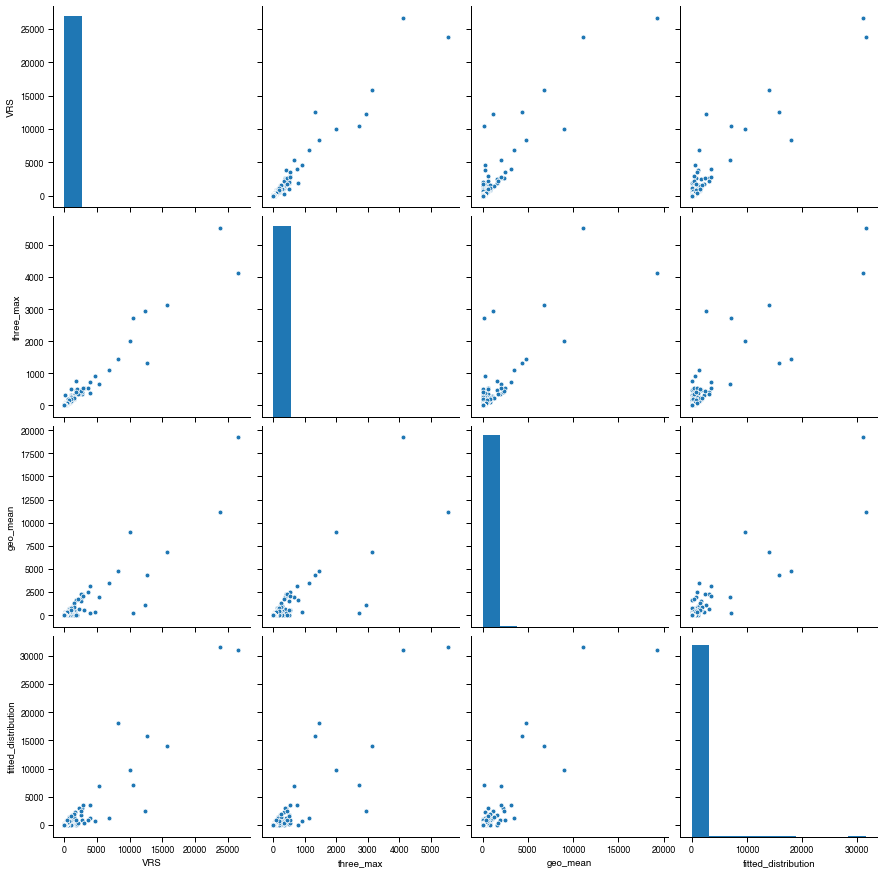

In [14]:
sns.pairplot(thresholds, height=3, aspect=1.0)
plt.show()

## Expression frequency

In [14]:
dist = pd.read_csv("{}/mathematica/fitted_distributions_dichotomised.csv".format(dataset),index_col="gene_id").mean(axis=1)
vrs = pd.read_csv("{}/intermediate/vrs/dichotomised_genes.csv".format(dataset),index_col="gene_id").mean(axis=1).loc[dist.index]
three_max = pd.read_csv("{}/intermediate/3max/dichotomised_genes.csv".format(dataset),index_col="gene_id").mean(axis=1).loc[dist.index]
geomean = pd.read_csv("{}/intermediate/geomean/dichotomised_genes.csv".format(dataset),index_col="gene_id").mean(axis=1).loc[dist.index]
frequencies = pd.DataFrame(
    [vrs, three_max, geomean, dist], 
    index=["VRS", "FM", "GTME", "Fit. Distr."]
).T

In [15]:
frequencies.shape

(6713, 4)

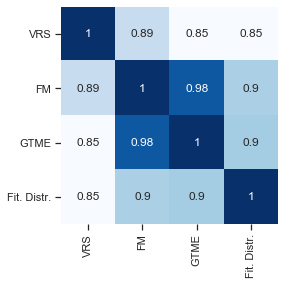

In [16]:
# display("Pearson")
# display(frequencies.corr(method="pearson"))
# display("Kendall")
# display(frequencies.corr(method="kendall"))
# display("Spearman")
# display(frequencies.corr(method="spearman"))
# frequencies.columns = ["VRS", "FM", "GTME", "Fit. Distr."]
# print(frequencies.corr(method="spearman").to_latex(float_format="%.2f"))

# sns.heatmap(frequencies.corr(method="spearman"), annot=True, cbar=False, cmap="Reds", square=True)
# plt.show()
sns.set(context="notebook", style="ticks", font="Arial")
sns.heatmap(frequencies.corr(method="spearman"), annot=True, cbar=False, cmap="Blues", square=True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()
# sns.heatmap(frequencies.corr(method="spearman"), center=0, annot=True, cbar=False, square=True)
# plt.show()

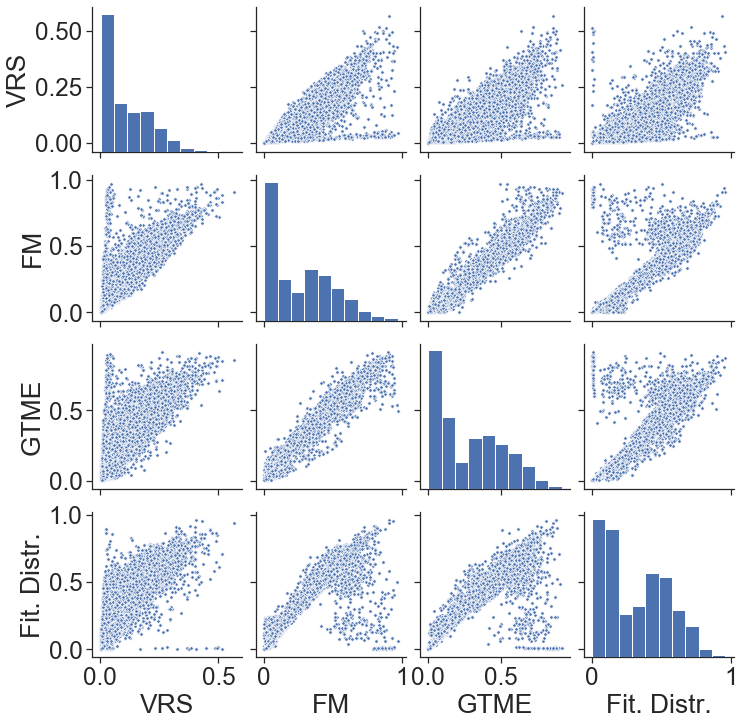

In [17]:
# sns.set(font_scale=1)
# sns.set()
# sns.set_context("notebook")
sns.set(font_scale=2.2, style="ticks", font="Arial")
sns.pairplot(frequencies, plot_kws={"s": 12})
plt.show()

In [18]:
import matplotlib
matplotlib.rcParams['font.family']
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'/home/iakovl0000/anaconda3/envs/stochastic/fonts/arial.ttf'

In [20]:
findfont(FontProperties(family="Arial"))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


'/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

# Manual correlation calculation

In [21]:
frequencies

,VRS,FM,GTME,Fit. Distr.
gene_id,,,,
March1,0.014706,0.039216,0.039216,0.039216
March2,0.348039,0.867647,0.848039,0.906863
March3,0.014706,0.058824,0.053922,0.068627
March10,0.009804,0.014706,0.014706,0.009804
Sept1,0.215686,0.416667,0.416667,0.446078
...,...,...,...,...
Zufsp,0.196078,0.578431,0.725490,0.740196
Zxdb,0.088235,0.250000,0.250000,0.250000
Zxdc,0.215686,0.421569,0.539216,0.539216


In [22]:
from scipy.stats import rankdata
geo_mean_ranks = rankdata(frequencies.geo_mean)
fitted_distributions_ranks = rankdata(frequencies.fitted_distribution)

AttributeError: 'DataFrame' object has no attribute 'geo_mean'

In [ ]:
from scipy.stats import pearsonr
pearsonr(geo_mean_ranks, fitted_distributions_ranks)

In [ ]:
n = len(geo_mean_ranks)
1 - (((geo_mean_ranks - fitted_distributions_ranks) ** 2).sum() * 6) / (n * (n ** 2 - 1)) 